<a href="https://colab.research.google.com/github/mullerino/AplicacaoWeb/blob/main/EDA_basedeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Emissão de CO2 por veículos**

## **Inspeção inicial na base de dados**

Base de dados a ser estudado: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [ ]:
# Instalando o Pandas Profiling
#!pip install pandas-profiling==2.7.1
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import seaborn as sns

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#link dos dados utilizados via github
url = "https://raw.githubusercontent.com/Moises788/Cie-ncia-de-Dados---UFRN/main/CO2%20Emissions_Canada.csv"
dataframe = pd.read_csv(url)
dataframe

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
dataframe.sample(15)

In [ ]:
dataframe.info()

## **Correalção entre variáveis**




In [7]:
dataframe['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [ ]:
#precisamos filtrar esse tipo de transmissão.
#A = Automatic
#AM = Automated manual
#AS = Automatic with select shift
#AV = Continuously variable
#M = Manual
#3 - 10 = Number of gears

#Criando uma nova coluna para diferenciar a transmissão se é automática ou manual
dataframe['Transmission Type'] = dataframe['Transmission'].apply(lambda x: x[0])
dataframe['Transmission Type'].value_counts()

A    6200
M    1185
Name: Transmission Type, dtype: int64

In [ ]:
#X = Regular gasoline
#Z = Premium gasoline
#D = Diesel
#E = Ethanol (E85)
#N = Natural gas
dataframe['Fuel Type'].value_counts()

In [8]:
corr_df = dataframe.corr(method='pearson')

In [ ]:
#Buscando a correlação das variavéis
plt.figure(figsize=(12, 8))
plt.tick_params(labelsize = 12)
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(18,6))
sns.pairplot(dataframe, hue='Vehicle Class', diag_kind={'kde':{'bw':1}})

In [ ]:
plt.figure(figsize=(18,6))
sns.pairplot(dataframe, hue='Transmission', diag_kind={'kde':{'bw':1}})

In [ ]:
plt.figure(figsize=(18,6))
sns.pairplot(dataframe, hue='Fuel Type', diag_kind={'kde':{'bw':1}})

In [ ]:
plt.figure(figsize=(18,6))
sns.pairplot(dataframe, hue='Engine Size(L)', diag_kind={'kde':{'bw':1}})

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=dataframe, x="CO2 Emissions(g/km)", kde=True, hue="Vehicle Class")

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=dataframe, x="CO2 Emissions(g/km)", kde=True, hue="Fuel Type")

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=dataframe, x="Fuel Consumption Comb (L/100 km)", kde=True, hue="Transmission Type")


In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=dataframe, x="Engine Size(L)", y="CO2 Emissions(g/km)", hue='Vehicle Class')

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=dataframe, x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", hue='Fuel Type')

## **Buscando a marca que tem maior taxa média de emissão**




Após a quantidade de carros em cada marca, notou-se que as marcas Bugatti e SRT não devem entrar na busca da maior taxa média de emissão, uma vez que elas possuem poucos carros.

In [ ]:
dataframe["Make"].value_counts() #Quantidade de carros por marca

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

In [9]:
n_df = dataframe[(dataframe["Make"]!="BUGATTI") & (dataframe["Make"]!="SRT")]
n_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [15]:
#Gerando um DF que contém todas as médias por marca
meanIndex_make = n_df.groupby("Make").mean()
meanIndex_make = meanIndex_make.reset_index()
allMean = np.array(meanIndex_make["CO2 Emissions(g/km)"]) #DF com todas as médias por marcas.
allMakes = np.array(meanIndex_make["Make"])

df_marca_media = pd.DataFrame(np.stack((allMakes,allMean), axis=1), columns = ['Marca','Média'])
df_marca_media = df_marca_media.sort_values(by='Média', ascending=False, na_position='first')
df_marca_media = df_marca_media.reset_index(drop=True)
df_marca_media["Média"] = df_marca_media["Média"].astype(float)
df_graf = df_marca_media.head()
df_graf

,Marca,Média
0,LAMBORGHINI,400.780488
1,ROLLS-ROYCE,388.480000
2,BENTLEY,362.934783
3,ASTON MARTIN,339.617021
4,MASERATI,318.147541


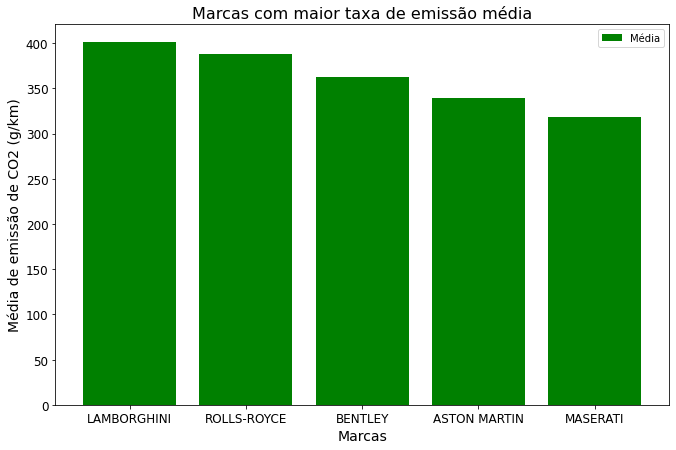

In [ ]:
#Gerando o gráfico com as 5 marcas com maior média de emissão de CO2
plt.figure(figsize=(11, 7))
plt.bar(df_graf['Marca'],df_graf['Média'], color = "green", label = "Média")
plt.title("Marcas com maior taxa de emissão média", size = 16)
plt.ylabel("Média de emissão de CO2 (g/km)", size = 14)
plt.xlabel("Marcas", size = 14)
plt.tick_params(labelsize = 12)
plt.legend(loc="upper right")

In [11]:
#Guardando os valores médios para cada marca

df_media_all = n_df.groupby("Make").mean()
df_media_all = df_media_all.reset_index()
df_media_all

,Make,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,3.037500,5.305556,10.797222,8.134722,9.602778,29.875000,223.652778
1,ALFA ROMEO,2.143333,4.466667,10.966667,7.963333,9.580000,30.133333,224.900000
2,ASTON MARTIN,5.189362,10.127660,17.091489,11.508511,14.582979,19.489362,339.617021
3,AUDI,2.865035,5.692308,12.431818,8.588811,10.701399,27.206294,250.846154
4,BENTLEY,5.382609,9.913043,18.965217,11.423913,15.567391,18.434783,362.934783
5,BMW,3.113472,6.018975,12.611575,8.719734,10.864326,26.787476,254.007590
6,BUICK,2.468932,4.660194,11.802913,8.418447,10.272816,28.320388,233.058252
7,CADILLAC,3.492405,5.708861,13.375949,9.201899,11.493038,25.215190,265.854430
8,CHEVROLET,3.685884,5.945578,13.772109,9.775680,11.973980,25.894558,264.346939
9,CHRYSLER,3.672727,5.954545,14.020455,9.070455,11.790909,24.568182,246.170455


In [ ]:
plt.figure(figsize=(18,6))
sns.pairplot(df_media_all, hue='Make', diag_kind={'kde':{'bw':1}})

É possível concluir a seguinte informação ao observar a última linha de gráficos:

A correlação entre as variavéis é confirmada, no exemplo do gráfico entre CO2 e Engine Size nota-se que quanto maior o tamanho do motor, maior será sua emissão.



## **Analise mais aprofundada das duas marcas com maior taxa de emissão de CO2**

Sabendo as duas marcas com a maiores taxa média de emissão realizamos a construção de alguns gráficos de barra para observar aspectos relacionado as demais variavéis presente no dataframe **[Classe do veículo, tamanho do motor, cilindros, transmissão].**


In [12]:
df_test = dataframe[(dataframe["Make"] == "LAMBORGHINI")  | (dataframe["Make"]=="ROLLS-ROYCE")]
df_test

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
637,LAMBORGHINI,AVENTADOR COUPE,TWO-SEATER,6.5,12,A7,Z,22.8,12.9,18.3,15,421
638,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,A6,Z,18.0,12.8,15.7,18,361
639,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,M6,Z,20.6,13.5,17.4,16,400
927,ROLLS-ROYCE,GHOST,FULL-SIZE,6.6,12,A8,Z,19.1,12.3,16.0,18,368
928,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,A8,Z,19.1,12.3,16.0,18,368
...,...,...,...,...,...,...,...,...,...,...,...,...
7288,ROLLS-ROYCE,Ghost,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,Ghost EWB,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7290,ROLLS-ROYCE,Phantom,FULL-SIZE,6.7,12,AS8,Z,20.0,11.8,16.3,17,382
7291,ROLLS-ROYCE,Phantom EWB,FULL-SIZE,6.7,12,AS8,Z,20.0,11.8,16.3,17,382


In [16]:
values_tr = df_test["Transmission"].value_counts()
df_values_tr = pd.DataFrame(values_tr, columns = ['Transmission'])
df_values_tr = df_values_tr.reset_index()
df_values_tr.rename(columns = {'Transmission':'Amounts','index':'Transmission'}, inplace = True)
df_values_tr

,Transmission,Amounts
0,AS8,45
1,AM7,36
2,A8,7
3,A7,1
4,A6,1
5,M6,1


In [ ]:
plt.figure(figsize=(10,5))
graf_tr = sns.barplot(x='Transmission', y='Amounts',hue="Transmission", data=df_values_tr, dodge=False)
plt.tick_params(labelsize = 12)

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [17]:
values_vc = df_test["Vehicle Class"].value_counts()
df_values_vc = pd.DataFrame(values_vc, columns = ['Vehicle Class'])
df_values_vc = df_values_vc.reset_index()
df_values_vc.rename(columns = {'Vehicle Class':'Amounts','index':'Vehicle Class'}, inplace = True)
df_values_vc

,Vehicle Class,Amounts
0,TWO-SEATER,39
1,FULL-SIZE,28
2,COMPACT,12
3,MID-SIZE,7
4,STATION WAGON - MID-SIZE,3
5,SUV - STANDARD,2


In [ ]:
plt.figure(figsize=(17,6))
graf_vc = sns.barplot(x='Vehicle Class', y='Amounts',hue="Vehicle Class", data=df_values_vc, dodge=False)
plt.tick_params(labelsize = 12)

In [18]:
values_es = df_test["Engine Size(L)"].value_counts()
df_values_es = pd.DataFrame(values_es, columns = ['Engine Size(L)'])
df_values_es = df_values_es.reset_index()
df_values_es.rename(columns = {'Engine Size(L)':'Amounts','index':'Engine Size(L)'}, inplace = True)
df_values_es

,Engine Size(L),Amounts
0,6.6,25
1,6.7,25
2,5.2,21
3,6.5,18
4,4.0,2


In [ ]:
plt.figure(figsize=(12,6))
graf_es = sns.barplot(x='Engine Size(L)', y='Amounts',hue="Engine Size(L)", data=df_values_es, dodge=False)
plt.tick_params(labelsize = 12)

In [20]:
values_cy = df_test["Cylinders"].value_counts()
df_values_cy = pd.DataFrame(values_cy, columns = ['Cylinders'])
df_values_cy = df_values_cy.reset_index()
df_values_cy.rename(columns = {'Cylinders':'Amounts','index':'Cylinders'}, inplace = True)
df_values_cy

,Cylinders,Amounts
0,12,68
1,10,21
2,8,2


In [ ]:
plt.figure(figsize=(12,6))
graf_cy = sns.barplot(x='Cylinders', y='Amounts',hue="Cylinders", data=df_values_cy, dodge=False)
plt.tick_params(labelsize = 12)

In [ ]:
df_test["Fuel Type"].value_counts()

# Uso de gráficos interativos

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(corr_df) #gráfico de correlação

In [ ]:
px.scatter(dataframe, x="Fuel Type", y="CO2 Emissions(g/km)", color='Fuel Type')

In [ ]:
px.scatter(dataframe, x="Transmission", y="CO2 Emissions(g/km)", color='Transmission')

In [ ]:
px.scatter(dataframe, x="Cylinders", y="CO2 Emissions(g/km)", color='Cylinders')

In [ ]:
px.scatter(dataframe, x="Engine Size(L)", y="CO2 Emissions(g/km)", color='Engine Size(L)')

In [ ]:
px.histogram(dataframe, x="CO2 Emissions(g/km)", color="Vehicle Class")

In [ ]:
px.histogram(dataframe, x="CO2 Emissions(g/km)", color="Fuel Type")

In [ ]:
 px.bar(df_graf, x='Marca', y='Média')

In [63]:
px.bar(df_values_cy, x='Cylinders', y='Amounts')

In [ ]:
px.bar(df_values_cy, x='Engine Size(L)', y='Amounts', color='Vehicle Class')

In [ ]:
px.bar(df_values_vc, x='Vehicle Class', y='Amounts', color='Vehicle Class')

# Aplicação em Dash

In [93]:
# Instalação do Dash
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.0 MB/s 


In [97]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html 
from dash.dependencies import Input, Output 
import pandas as pd

In [57]:
corr_df
dataframe
df_graf
df_values_cy
df_values_vc

[3, 4, 5, 6, 8, 10, 12, 16]

In [155]:
external_stylesheets = external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)


#Listas para os menu's dropdown
op_typefuel = list(dataframe["Fuel Type"].unique()) #será usado para selecionar o tipo de combustível
op_typefuel.sort()
op_typefuel.append("Todos os tipos")
op_transm = list(dataframe["Transmission"].unique())
op_transm.append("Todos os tipos")
op_cilindros = list(dataframe["Cylinders"].unique())
op_cilindros.sort()
op_cilindros.append("Todos os tipos")
op_engsize = list(dataframe["Engine Size(L)"].unique())
op_engsize.sort()
op_engsize.append("Todos os tipos")
op_VC = list(dataframe["Vehicle Class"].unique())
op_VC.sort()
op_VC.append("Todos as classes")


app.layout = html.Div(style = {'font' : 'Arial Narrow, sans-serif','border-radius': '70px','border': '0.5px solid black','width' : '80%', 'margin':'auto', 'padding':'15px'},children=[

  html.H2(children="Análise da emissão de CO2 por veiculos automotivos", style = {'margin-bottom':'25px', 'padding':'20px', 'textAlign':'center'}),

  html.Div(children=[
  html.H4(children="Correlação entre as variavéis", style = {'textAlign' : 'center'}),

  dcc.Graph(
      id='graf_corr',
      figure = px.imshow(corr_df), style = {'margin-bottom' : '20px'}
  )]
  ),

  html.H4(children="Tipo de gasolina X Emissão de CO2.", style = {'textAlign':'center'}),

  dcc.Dropdown(op_typefuel, value='Todos os tipos', id='lista_fuel'),
  
  dcc.Graph(
      id='graf_fuelEmissao',
      figure = px.scatter( #gráfico que mostra a relação entre o tipo de gasolina e a emissão
      dataframe, x="Fuel Type", y="CO2 Emissions(g/km)", color="Fuel Type"
      ), style = {'margin-bottom' : '20px'}
  ),

  html.H4(children="Tipo de transmissão X Emissão de CO2.", style = {'textAlign':'center'}),

  dcc.Dropdown(op_transm, value='Todos os tipos', id='lista_transm'),

  dcc.Graph(
      id='graf_transm',
      figure = px.scatter( #gráfico que mostra a relação entre o tipo de gasolina e a emissão
      dataframe, x="Transmission", y="CO2 Emissions(g/km)", color='Transmission'
      ), style = {'margin-bottom' : '20px'}
  ),

  html.H4(children="Quantidade de cilindros X Emissão de CO2.", style = {'textAlign':'center' , 'margin-bottom' : '15px'}),

  dcc.Dropdown(op_cilindros, value='Todos os tipos', id='lista_cilindros'),

  dcc.Graph(
      id='graf_cilindros',
      figure = px.scatter(dataframe, x="Cylinders", y="CO2 Emissions(g/km)", color='Cylinders'), style = {'margin-bottom' : '20px'}
  ), 

  html.H4(children="Tamanho do motor X Emissão de CO2.", style = {'textAlign':'center', 'margin-bottom':'15px'}),

  dcc.Dropdown(op_engsize, value='Todos os tipos', id='lista_engsize'),

  dcc.Graph(
      id='graf_engsize',
      figure = px.scatter(dataframe, x="Engine Size(L)", y="CO2 Emissions(g/km)", color='Engine Size(L)'), style = {'margin-bottom' : '20px'}
  ),

  html.H4(children="Classe dos veículos X Emissão de CO2.", style = {'textAlign':'center','margin-bottom':'15px'}),

  dcc.Dropdown(op_VC, value='Todos as classes', id='lista_VC'),

  dcc.Graph(
      id='grafH_VC',
      figure = px.histogram(dataframe, x="CO2 Emissions(g/km)", color="Vehicle Class"), style = {'margin-bottom' : '20px'}
  ),

  html.H4(children="Quantidade de veículos X Emissão de CO2.", style = {'textAlign':'center' , 'margin-bottom' : '15px'}),

  dcc.Dropdown(op_typefuel, value='Todos os tipos de transmissão', id='lista_FT'),

  dcc.Graph(
      id='grafH_FT',
      figure = px.histogram(dataframe, x="CO2 Emissions(g/km)", color="Fuel Type"), style = {'margin-bottom' : '20px'}
  )
])

@app.callback(
    Output('graf_fuelEmissao','figure'),
    Input('lista_fuel','value'),
)

def uptade_gfuel(value):
  if (value == 'Todos os tipos'):
      fig = px.scatter(dataframe, x="Fuel Type", y="CO2 Emissions(g/km)", color="Fuel Type")
  else:
      fig_filtrada = dataframe.loc[dataframe["Fuel Type"] == value, :]
      fig = px.scatter(fig_filtrada, x="Fuel Type", y="CO2 Emissions(g/km)", color="Fuel Type")
  return fig

@app.callback(
    Output('graf_transm','figure'),
    Input('lista_transm','value')
)

def uptade_gtransm(value):
  if (value == 'Todos os tipos'):
      fig = px.scatter(dataframe, x="Transmission", y="CO2 Emissions(g/km)", color="Transmission")
  else:
      fig_filtrada = dataframe.loc[dataframe["Transmission"] == value, :]
      fig = px.scatter(fig_filtrada, x="Transmission", y="CO2 Emissions(g/km)", color="Transmission")
  return fig

@app.callback(
    Output('graf_cilindros','figure'),
    Input('lista_cilindros','value')
)

def uptade_gCilind(value):
  if (value == 'Todos os tipos'):
      fig = px.scatter(dataframe, x="Cylinders", y="CO2 Emissions(g/km)", color="Cylinders")
  else:
      fig_filtrada = dataframe.loc[dataframe["Cylinders"] == value, :]
      fig = px.scatter(fig_filtrada, x="Cylinders", y="CO2 Emissions(g/km)", color="Cylinders")
  return fig

@app.callback(
    Output('graf_engsize','figure'),
    Input('lista_engsize','value')
)

def uptade_gEngsize(value):
  if (value == 'Todos os tipos'):
      fig = px.scatter(dataframe, x="Engine Size(L)", y="CO2 Emissions(g/km)", color='Engine Size(L)')
  else:
      fig_filtrada = dataframe.loc[dataframe["Engine Size(L)"] == value, :]
      fig = px.scatter(fig_filtrada, x="Engine Size(L)", y="CO2 Emissions(g/km)", color="Engine Size(L)")
  return fig

@app.callback(
    Output('grafH_VC','figure'),
    Input('lista_VC','value')
)

def uptade_gVecC(value):
  if (value == 'Todos as classes'):
      fig = px.histogram(dataframe, x="CO2 Emissions(g/km)", color="Vehicle Class")
  else:
      fig_filtrada = dataframe.loc[dataframe["Vehicle Class"] == value, :]
      fig = px.histogram(fig_filtrada, x="CO2 Emissions(g/km)", color="Vehicle Class")
  return fig

if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [156]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=ef68c1568d048a03c43208fed1f7881135dbf203d49f0b4c4f55a458778549fe
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [160]:
! ngrok authtoken 2BGxSAfs1A0n7SNrTmkWla5IzJk_2KuJiSu25dkbURR6Xc5LA

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [161]:
from pyngrok import ngrok

public_url = ngrok.connect('8050')
public_url

<NgrokTunnel: "http://ef17-107-167-186-22.ngrok.io" -> "http://localhost:8050">

In [159]:
ngrok.kill() #para encerrar o aplicativo